# Data Cleansing

The goal is to be able to randomly pick 5 Mutual Funds from specific catagories and still have a 10% YOY return but a few alterations need to be made to the raw dataset so that all the Mutual Funds will have a base level of quality.

Start by importing the libraries that will be needed for the project and importing the raw datset.

In [1]:
# Import of Python Libraries to be used for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Raw CSV File into a DF
df_raw = pd.read_csv("Mutual Funds.csv")
print(df_raw.shape)

(23783, 298)


Check the column data types to see everything loaded and what fields are needed. 

In [3]:
print(df_raw.dtypes)

fund_symbol             object
quote_type              object
region                  object
fund_short_name         object
fund_long_name          object
                        ...   
peer_social_max        float64
governance_score       float64
peer_governance_min    float64
peer_governance_avg    float64
peer_governance_max    float64
Length: 298, dtype: object


Only key metrics such as yearly returns from the past 20 years and the Morningstar rating hypothetically are need to be able to pick random Mutual Funds so the other fields are not needed for this analysis.

In [4]:
# Create DF with only Fields that will likely be used
df_clean1= df_raw[['fund_symbol','fund_long_name','fund_category','total_net_assets','year_to_date_return','fund_yield','morningstar_overall_rating','inception_date','investment_type','size_type','fund_price_book_ratio','fund_price_cashflow_ratio','fund_price_earning_ratio','fund_price_sales_ratio','fund_return_10years','years_up','years_down','fund_return_2020','fund_return_2019','fund_return_2018','fund_return_2017','fund_return_2016','fund_return_2015','fund_return_2014','fund_return_2013','fund_return_2012','fund_return_2011','fund_return_2010','fund_return_2009','fund_return_2008','fund_return_2007','fund_return_2006','fund_return_2005','fund_return_2004','fund_return_2003','fund_return_2002','fund_return_2001','fund_return_2000','quarters_up','quarters_down','fund_alpha_10years','fund_beta_10years','fund_mean_annual_return_10years','fund_r_squared_10years','fund_stdev_10years','fund_sharpe_ratio_10years','fund_treynor_ratio_10years']]
df_clean1.columns = df_clean1.columns.str.replace(' ', '')
print(df_clean1.shape)

(23783, 47)


A large portion of the raw datset includes null values since the funds are young and without data from at least the year 2000 making them unreliable for a random pick.

In [5]:
# Important to show how many funds are young and not reliable
print(df_clean1.isnull().sum())

fund_symbol                            0
fund_long_name                         5
fund_category                        663
total_net_assets                      34
year_to_date_return                  401
fund_yield                          5097
morningstar_overall_rating          1807
inception_date                         0
investment_type                     1109
size_type                           1109
fund_price_book_ratio               6031
fund_price_cashflow_ratio           6325
fund_price_earning_ratio            6811
fund_price_sales_ratio              5365
fund_return_10years                11346
years_up                            1318
years_down                          1318
fund_return_2020                    1316
fund_return_2019                    2125
fund_return_2018                    3282
fund_return_2017                    4706
fund_return_2016                    5883
fund_return_2015                    7409
fund_return_2014                    8551
fund_return_2013

To pick a quality Mutual Funds part of the critera should be that the fund has withstood multiple market cycles so any funds without returns from at least the year 2000 should be removed.

In [6]:
# Removing Rows that have missing data primarly the largest missing data is year 2000 returns as the MF is to young 
df_clean2 = df_clean1.dropna()
# Important to show how many funds are young and not reliable
print(df_clean2.isnull().sum())

fund_symbol                        0
fund_long_name                     0
fund_category                      0
total_net_assets                   0
year_to_date_return                0
fund_yield                         0
morningstar_overall_rating         0
inception_date                     0
investment_type                    0
size_type                          0
fund_price_book_ratio              0
fund_price_cashflow_ratio          0
fund_price_earning_ratio           0
fund_price_sales_ratio             0
fund_return_10years                0
years_up                           0
years_down                         0
fund_return_2020                   0
fund_return_2019                   0
fund_return_2018                   0
fund_return_2017                   0
fund_return_2016                   0
fund_return_2015                   0
fund_return_2014                   0
fund_return_2013                   0
fund_return_2012                   0
fund_return_2011                   0
f

In [7]:
print(df_clean2.shape)

(1702, 47)


This provides a Dataset with just over 17 thousand Mutual Funds with the final criteria being to remove all Mutual Funds with a Morningstar rating of 1 or 2 out of 5.  This removes junk quality Mutual Funds that exist. 

In [8]:
df_clean3 = df_clean2[df_clean2['morningstar_overall_rating'] > 2 ]

In [9]:
print(df_clean3.shape)

(1272, 47)


After cleaning the data we are left with 1272 Mutual Funds that meet a baseline of which 5 will be picked randomly solely based on their asset class. 

In [10]:
# renaming the DataFrame for easy understanding during the analysis
df_cleaned = df_clean3 

# Insights

5 DataFrames will be created that each include one specific Mutual Fund Type in the fund category column.  A blend is chosen which is a combination of both value and growth funds to increase the simplicity as the goal is to randomly pick funds without any knowledge of the existing markets.

Then a random Mutual Fund will be chosen out of each DataFrame and weighted to the following specific percentages: Large Cap Blend 25%, Mid Cap Blend 20%, Small Cap Blend 20%, Emerging Markets 25%, and High yield bonds at 10%.  

The hypothesis is that regardless of which 5 Mutual funds are choses the average return should be approximately 10% which should be enough to offset 2022 inflation rates.

Large Cap 

In [11]:
large_cap = df_cleaned[df_cleaned['fund_category'] == 'Large Blend']
print(large_cap.shape)

(184, 47)


Mid Cap Blend 

In [12]:
mid_cap = df_cleaned[df_cleaned['fund_category'] == 'Mid-Cap Blend']
print(mid_cap.shape)

(34, 47)


Small Cap Blend 

In [13]:
small_cap = df_cleaned[df_cleaned['fund_category'] == 'Small Blend']
print(small_cap.shape)

(60, 47)


Emerging Markets 

In [14]:
emerging_markets = df_cleaned[df_cleaned['fund_category'] == 'Diversified Emerging Mkts']
print(emerging_markets.shape)

(47, 47)


High yield bonds

In [15]:
bonds = df_cleaned[df_cleaned['fund_category'] == 'High Yield Bond']
print(bonds.shape)

(21, 47)


Randomly pick a Mutual Fund of each of the 5 catagories.

In [16]:
large_cap = large_cap.sample()
mid_cap = mid_cap.sample()
small_cap = small_cap.sample()
random_emerging_markets = emerging_markets.sample()
random_bonds = bonds.sample()

Create a new DataFrame with the 5 random mutual fund results

In [17]:
random_dataset = pd.concat([large_cap,mid_cap,small_cap,random_emerging_markets,random_bonds])
random_dataset['fund_long_name'].str.strip()
print(random_dataset.shape)


(5, 47)


In [18]:
def random_MF():
    print(random_dataset.fund_long_name.to_string(index=False))
random_MF()

                    Davis Opportunity Fund Class Y
CIBC Atlas Disciplined Equity Fund Institutiona...
          Eaton Vance Large-Cap Value Fund Class A
            AB Discovery Growth Fund Advisor Class
    Wells Fargo High Yield Bond Fund - Class Admin


Calculate the sum of each Mutual Fund from 2000 to 2020.

In [19]:
large_cap_mean = large_cap[['fund_return_2020','fund_return_2019','fund_return_2018','fund_return_2017','fund_return_2016','fund_return_2015','fund_return_2014','fund_return_2013','fund_return_2012','fund_return_2011','fund_return_2010','fund_return_2009','fund_return_2008','fund_return_2007','fund_return_2006','fund_return_2005','fund_return_2004','fund_return_2003','fund_return_2002','fund_return_2001','fund_return_2000']].mean(axis = 1).values
print(large_cap_mean)
mid_cap_mean = mid_cap[['fund_return_2020','fund_return_2019','fund_return_2018','fund_return_2017','fund_return_2016','fund_return_2015','fund_return_2014','fund_return_2013','fund_return_2012','fund_return_2011','fund_return_2010','fund_return_2009','fund_return_2008','fund_return_2007','fund_return_2006','fund_return_2005','fund_return_2004','fund_return_2003','fund_return_2002','fund_return_2001','fund_return_2000']].mean(axis = 1).values
print(mid_cap_mean)
small_cap_mean = small_cap[['fund_return_2020','fund_return_2019','fund_return_2018','fund_return_2017','fund_return_2016','fund_return_2015','fund_return_2014','fund_return_2013','fund_return_2012','fund_return_2011','fund_return_2010','fund_return_2009','fund_return_2008','fund_return_2007','fund_return_2006','fund_return_2005','fund_return_2004','fund_return_2003','fund_return_2002','fund_return_2001','fund_return_2000']].mean(axis = 1).values
print(small_cap_mean)
random_emerging_markets_mean = random_emerging_markets[['fund_return_2020','fund_return_2019','fund_return_2018','fund_return_2017','fund_return_2016','fund_return_2015','fund_return_2014','fund_return_2013','fund_return_2012','fund_return_2011','fund_return_2010','fund_return_2009','fund_return_2008','fund_return_2007','fund_return_2006','fund_return_2005','fund_return_2004','fund_return_2003','fund_return_2002','fund_return_2001','fund_return_2000']].mean(axis = 1).values
print(random_emerging_markets_mean)
random_bonds_mean = random_bonds[['fund_return_2020','fund_return_2019','fund_return_2018','fund_return_2017','fund_return_2016','fund_return_2015','fund_return_2014','fund_return_2013','fund_return_2012','fund_return_2011','fund_return_2010','fund_return_2009','fund_return_2008','fund_return_2007','fund_return_2006','fund_return_2005','fund_return_2004','fund_return_2003','fund_return_2002','fund_return_2001','fund_return_2000']].mean(axis = 1).values
print(random_bonds_mean)

[0.10241714]
[0.10481667]
[0.12059095]
[0.10833238]
[0.07146571]


Plot of the random average returns for each of the 5 catagories

[0.10241714 0.10481667 0.12059095 0.10833238 0.07146571]


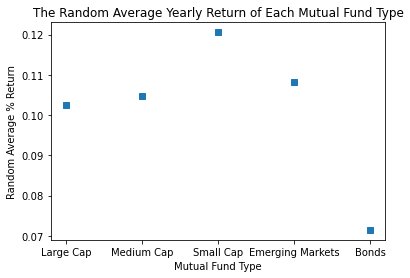

In [20]:
combined = np.hstack((large_cap_mean, mid_cap_mean, small_cap_mean, random_emerging_markets_mean, random_bonds_mean))
print(combined)
plt.plot(combined, marker = "s", linestyle = "none")
plt.xticks([0,1,2,3,4],["Large Cap","Medium Cap","Small Cap","Emerging Markets","Bonds"])
plt.xlabel('Mutual Fund Type')
plt.ylabel('Random Average % Return')
plt.title('The Random Average Yearly Return of Each Mutual Fund Type')
plt.show()

Calculating the weighted average to complete the portfolio yearly percentage return

In [21]:
#  weighted avarage
total_portfolio_as_percentage = (((large_cap_mean * 0.25) + (mid_cap_mean * 0.25) + (small_cap_mean * 0.20) + (random_emerging_markets_mean * 0.25) + (random_bonds_mean * 0.05)))
print((np.round(total_portfolio_as_percentage, 4))*100)

[10.66]


Conclusion:

The randomly weighted Mutual Fund portfolio generated 5 mutual funds with an average annual return of 10.66%.  The goal was to return at least 10% to be able to offset current inflation rates.  This has been achieved.

In [24]:
print("The 5 Mutual Funds that the system has randomly chosen to offset inflation are:")


The 5 Mutual Funds that the system has randomly chosen to offset inflation are:


In [26]:
random_MF()

                    Davis Opportunity Fund Class Y
CIBC Atlas Disciplined Equity Fund Institutiona...
          Eaton Vance Large-Cap Value Fund Class A
            AB Discovery Growth Fund Advisor Class
    Wells Fargo High Yield Bond Fund - Class Admin
